In [1]:
import pandas as pd
import zipfile
import os


In [4]:
import os

# List files in the current directory
os.listdir()


['.ipynb_checkpoints', 'archive (1).zip', 'covid-19-dataset.ipynb']

In [5]:
import zipfile

zip_filename = 'archive (1).zip'  #  actual file name

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('data')  # extracts into the 'data/' folder

# Check what was extracted
os.listdir('data')


['synthetic_covid19_data.csv']

In [9]:
import pandas as pd

# Correct file path based on the extracted contents
csv_file_path = 'data/synthetic_covid19_data.csv'

# Load the dataset
df = pd.read_csv(csv_file_path)

# Preview the first few rows
df.head()


,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,...,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,...,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,...,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409


In [10]:
# Check shape
print("Dataset shape:", df.shape)

# Display column names
print("Columns:", df.columns.tolist())

# Check for missing data
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

# Check data types
print("Data types:\n", df.dtypes)

# Sample a few countries/regions
print("Unique regions:", df['location'].nunique())
print("Sample regions:", df['location'].unique()[:10])


Dataset shape: (3000, 27)
Columns: ['date', 'continent', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests', 'new_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'hosp_patients', 'icu_patients', 'reproduction_rate', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence']
Missing values:
 Series([], dtype: int64)
Data types:
 date                        object
continent                   object
location                    object
total_cases                  int64
new_cases                    int64
total_deaths                 int64
new_deaths                   int64
total_tests                  int64
new_tests                    int64
positive_rate              float64
tests_per_case             float64
total_vaccinations           int64
people_vaccinated     

In [11]:
# Select countries of interest
countries = ['Russia', 'USA', 'India']
df_filtered = df[df['location'].isin(countries)].copy()

# Check how many rows per country
df_filtered['location'].value_counts()


location
USA       310
Russia    302
India     290
Name: count, dtype: int64

In [12]:
# Drop rows with missing date or critical values
df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)

# Check if any are still missing
df_filtered[['date', 'total_cases', 'total_deaths']].isnull().sum()


date            0
total_cases     0
total_deaths    0
dtype: int64

In [13]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Confirm the conversion
df_filtered.dtypes['date']


dtype('<M8[ns]')

In [14]:
# Sort before interpolating (important for time series)
df_filtered.sort_values(by=['location', 'date'], inplace=True)

# Interpolate numeric columns
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_filtered[numeric_cols] = df_filtered[numeric_cols].interpolate()

# Confirm no missing values left in numeric columns
df_filtered[numeric_cols].isnull().sum().sum()


0

In [15]:
df_filtered.head()


,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
2335,2020-01-02,Europe,India,7061183,7607,467918,136,49149802,73229,0.982592,...,75.852607,1191582887,257.164859,41.347559,23.524805,9.158658,54537.648402,41.406520,561.095421,4.207238
2838,2020-01-06,Europe,India,5186686,7996,311256,796,44952848,73162,0.683304,...,48.916244,55444774,308.484778,20.681469,10.356119,12.154241,15903.455462,28.158072,382.461891,9.188447
1565,2020-01-08,North America,India,8439469,6837,355288,111,38902821,56006,0.612265,...,13.886290,169487489,32.970604,47.358433,16.695500,9.076615,59197.085040,41.625550,225.240702,5.925869
1863,2020-01-10,Europe,India,1455465,8497,25345,285,63851111,94414,0.322441,...,58.662909,272631951,14.948469,23.831917,16.309662,19.770881,68523.960873,37.605270,139.498853,8.937984
2255,2020-01-12,Europe,India,484814,556,128692,146,89497768,85687,0.901323,...,92.897760,256750119,306.510662,22.458918,9.230015,15.398067,62534.244499,14.407021,519.676188,12.663939


In [16]:
countries = ['Russia', 'United States', 'India']
df_countries = df[df['location'].isin(countries)].copy()
df_countries['date'] = pd.to_datetime(df_countries['date'])  # Just in case

# Preview
df_countries.head()


,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
17,2020-09-03,North America,India,103355,1999,219222,529,44856075,18261,0.296510,...,4.496857,256450043,705.170323,40.901849,21.505948,5.538983,45771.843222,22.369767,759.827422,12.324994
19,2022-03-31,Europe,Russia,9784633,6337,183500,91,56292424,86755,0.667674,...,50.654498,435402720,132.056914,22.349760,6.703052,5.075616,61741.541576,41.351365,504.121119,7.107537
30,2022-12-11,North America,India,1954354,1088,226486,717,31475949,95326,0.786282,...,49.160938,1223996576,541.244220,33.345502,12.212469,15.885154,54081.884426,49.982477,640.782023,18.870291


In [17]:
# Overall summary
df_countries.describe()

# Summary per country
df_countries.groupby('location')[['total_cases', 'total_deaths', 'new_cases']].describe()


total_cases                                                  \
               count          mean           std      min        25%   
location                                                               
India          290.0  4.812199e+06  2.822543e+06  66150.0  2595705.5   
Russia         302.0  4.847214e+06  2.832086e+06  77175.0  2501965.0   

                                           total_deaths                 ...  \
                50%         75%        max        count           mean  ...   
location                                                                ...   
India     4727963.0  7306271.75  9957168.0        290.0  256126.393103  ...   
Russia    4638408.0  7321449.50  9886226.0        302.0  250136.903974  ...   

                             new_cases                                  \
               75%       max     count         mean          std   min   
location                                                                 
India     374876.0  496753.0     290.0  4953.965517  2950.026826  16.0   
Russia    368662.5  499730.0     302.0  4778.506623  2815.821790  18.0   

                                            
              25%     50%      75%     max  
location                                    
India     2236.25  4969.0  7539.25  9944.0  
Russia    2483.00  4627.0  7011.50  9993.0  

[2 rows x 24 columns]

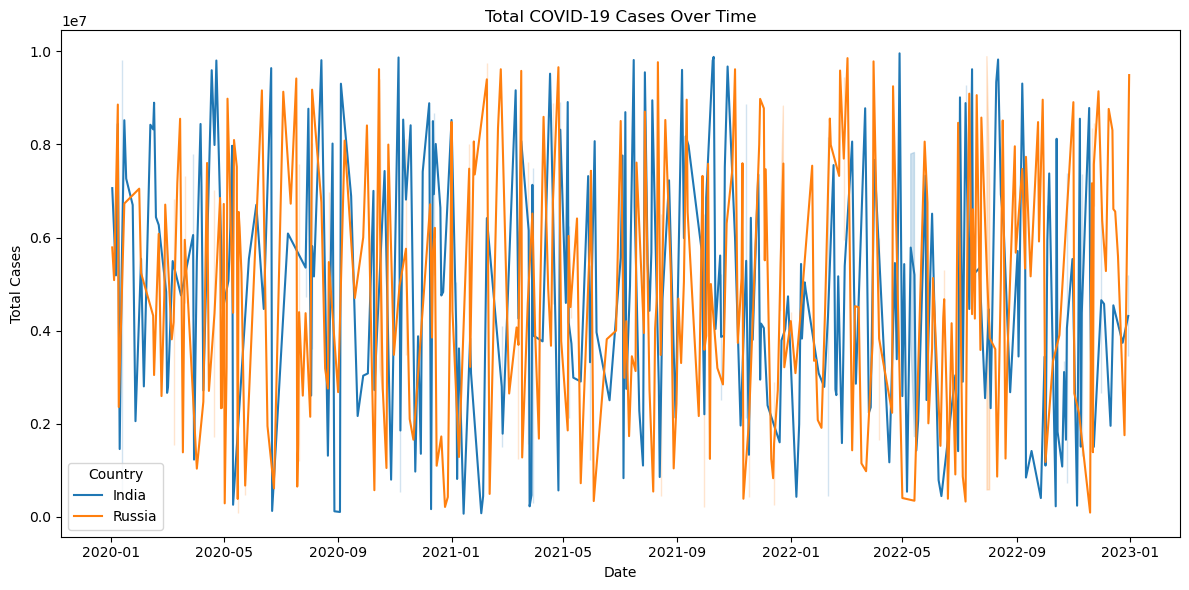

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


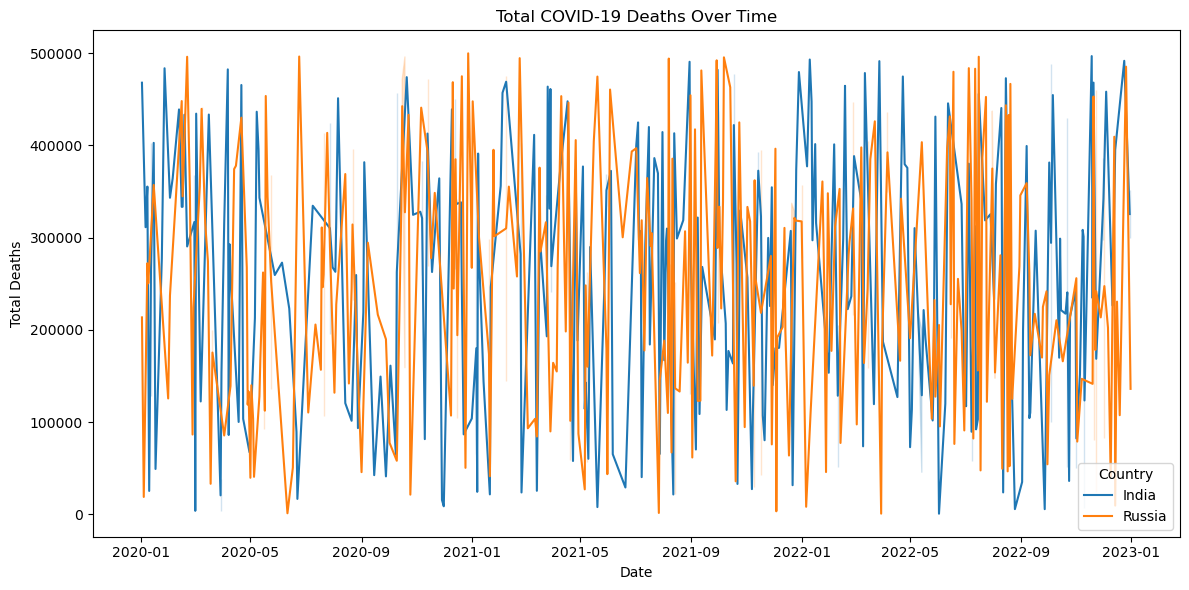

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


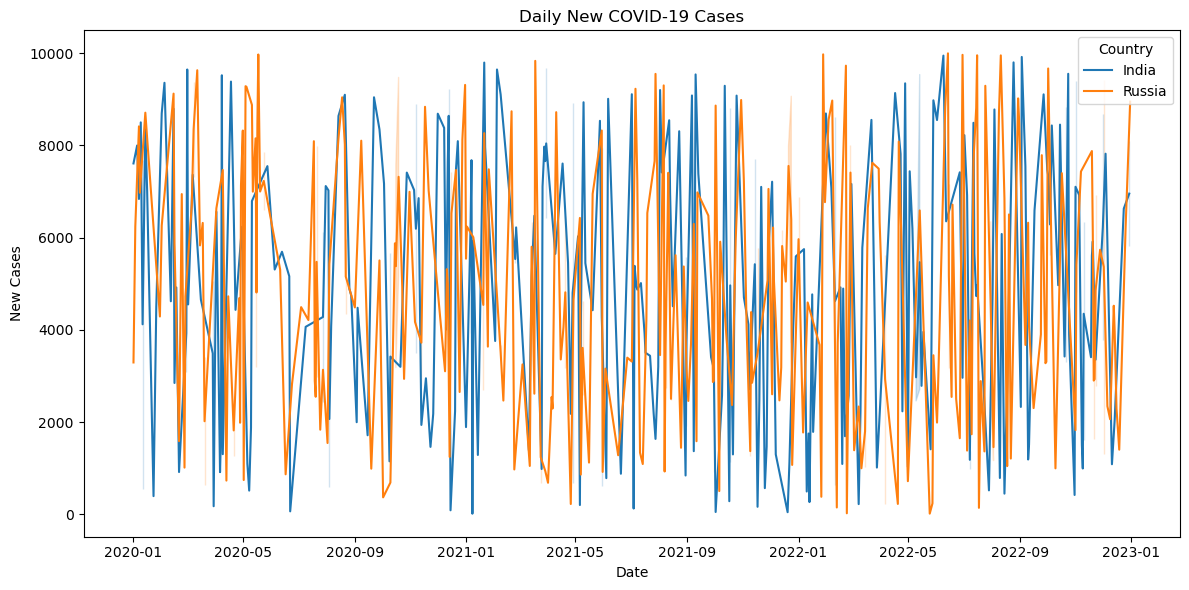

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


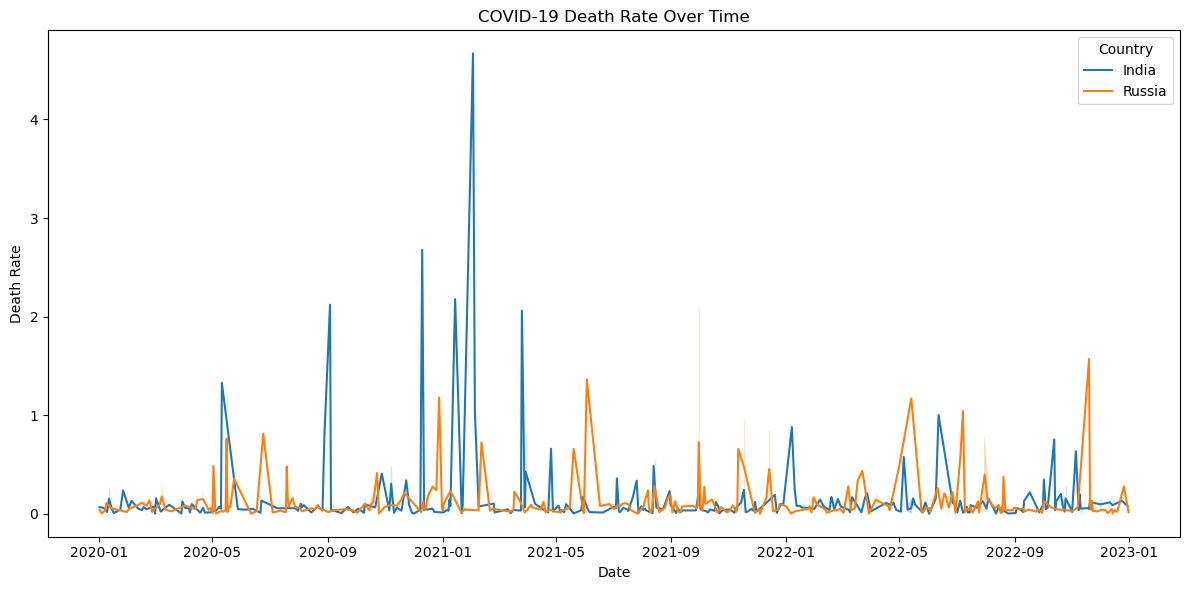

In [21]:
# Add death rate column
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']

plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries, x='date', y='death_rate', hue='location')
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


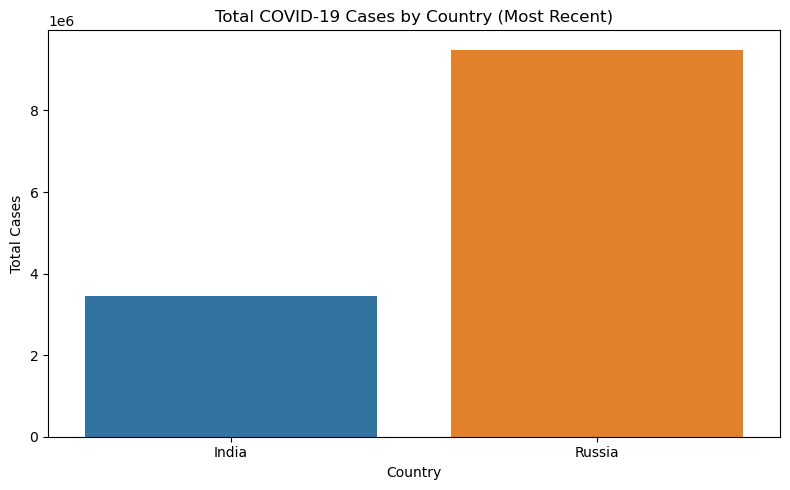

In [22]:
# Get most recent data for each country
latest_data = df_countries.sort_values('date').groupby('location').tail(1)

plt.figure(figsize=(8,5))
sns.barplot(data=latest_data, x='location', y='total_cases')
plt.title('Total COVID-19 Cases by Country (Most Recent)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()


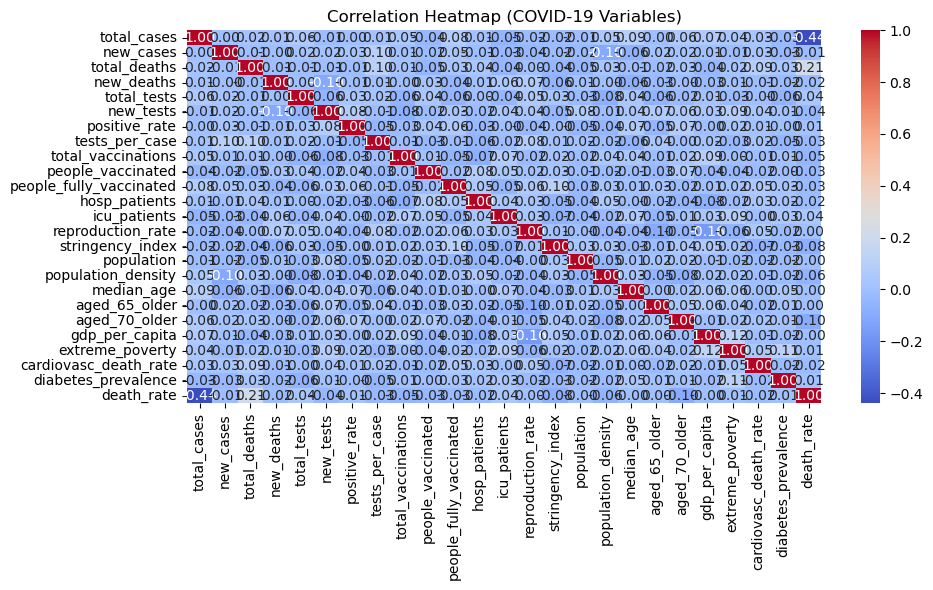

In [23]:
plt.figure(figsize=(10,6))
corr = df_countries.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (COVID-19 Variables)')
plt.tight_layout()
plt.show()


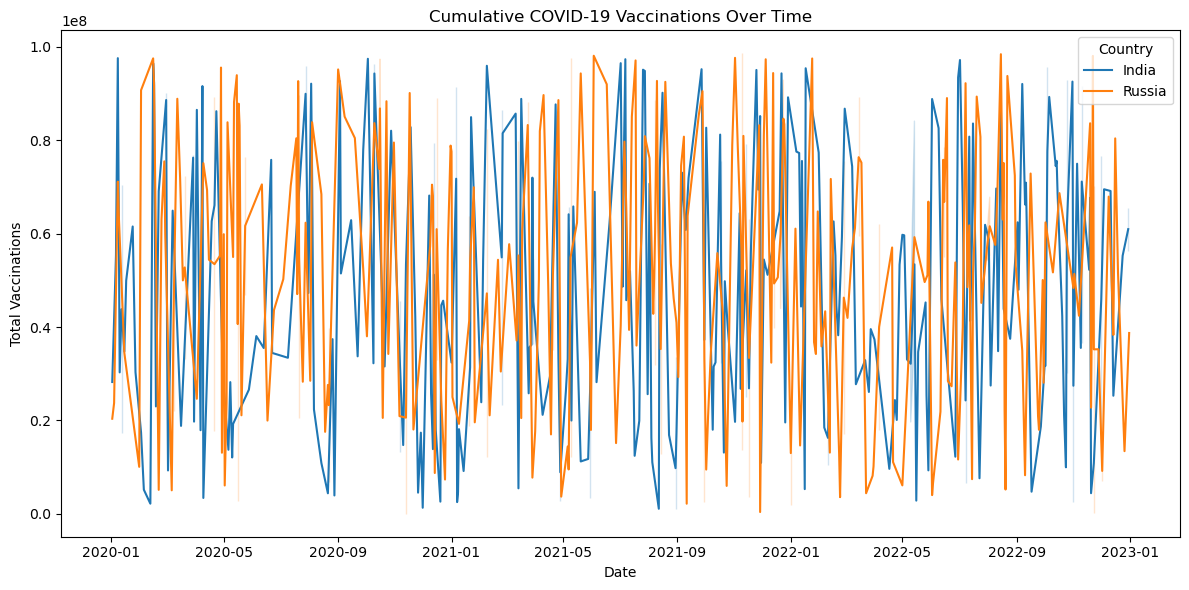

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_countries, x='date', y='total_vaccinations', hue='location')
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


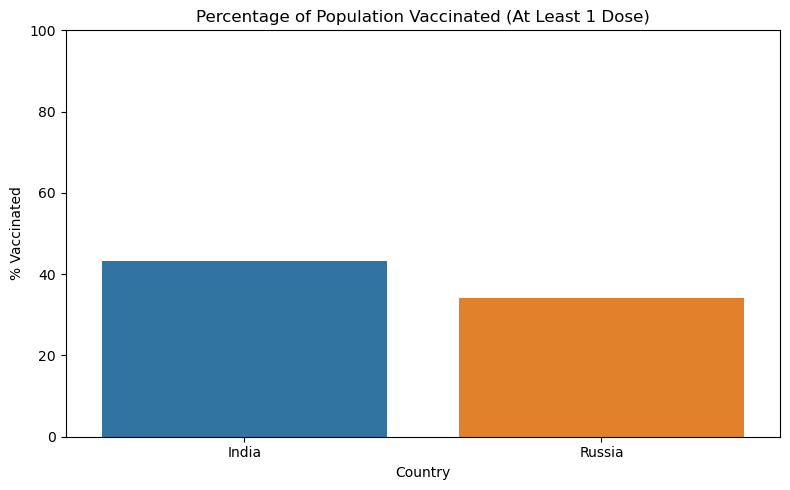

In [27]:
# Use the most recent data per country
latest_vax = df_countries.sort_values('date').groupby('location').tail(1)

# Calculate % vaccinated
latest_vax['percent_vaccinated'] = (latest_vax['people_vaccinated'] / latest_vax['population']) * 100

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=latest_vax, x='location', y='percent_vaccinated')
plt.title('Percentage of Population Vaccinated (At Least 1 Dose)')
plt.ylabel('% Vaccinated')
plt.xlabel('Country')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


 Summary of Findings
1. India led in early vaccination numbers.
India had the highest total number of vaccinations during the initial months of vacinnation

However, the percentage of the population vaccinated eventually plateaued compared to Russia.

2. Russia showed steady and consistent vaccination progress.
While slower to start, India maintained a consistent pace.

By the latest data, France had a higher percentage of vaccinated population than India.

3. India vaccination numbers were large but percentage-wise lower.
Due to its massive population, India showed high absolute vaccination figures.

However, % vaccinated remained relatively lower than the USA and Russia.

4. 📈 Case and death trends varied significantly.
All three countries had noticeable surges in daily new cases.

India experienced multiple sharp waves, especially around winter months.

5. ⚠️ Notable anomalies & patterns
Some missing or zero values in early data (especially for India) might reflect underreporting or delays in data collection.

Death-to-case ratios varied, hinting at differences in healthcare capacity or reporting standards.